In [1]:
%matplotlib inline

from time import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.decomposition import TruncatedSVD
from scipy.cluster.hierarchy import linkage, dendrogram

from atlas_pam import *

/home/ryan/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv("joseph_data/SCP44/expression/atlas_Log2Tpm_round2.txt",
                sep="\t", index_col="GENE")

print(df.shape)

(15971, 7216)


In [3]:
X = df.to_numpy().T

dist_mat = euclidean_distances(X, X)

start = time()
tree_mat = linkage(X)
print(time() - start)

start = time()
cov_mat = np.cov(X, rowvar=False)
print(time() - start)
print(cov_mat.shape)

In [7]:
tsvd = TruncatedSVD(n_components=3)
tsvd.fit(X)

TruncatedSVD(n_components=3)

In [8]:
Y = tsvd.transform(X)

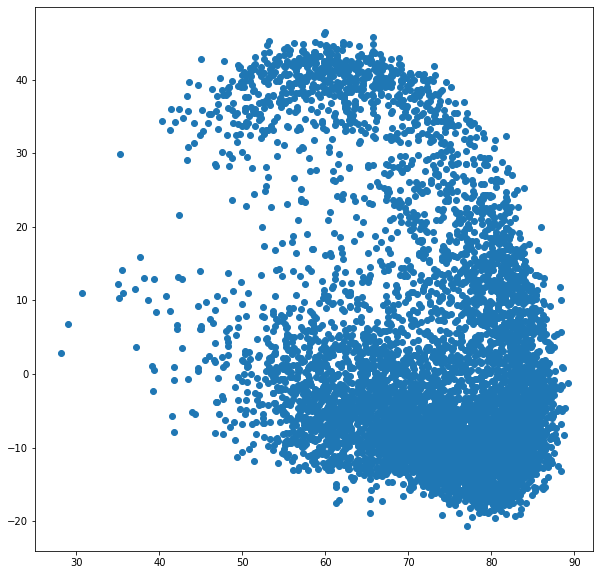

In [9]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.scatter(Y[:, 0], Y[:, 1])

plt.show()

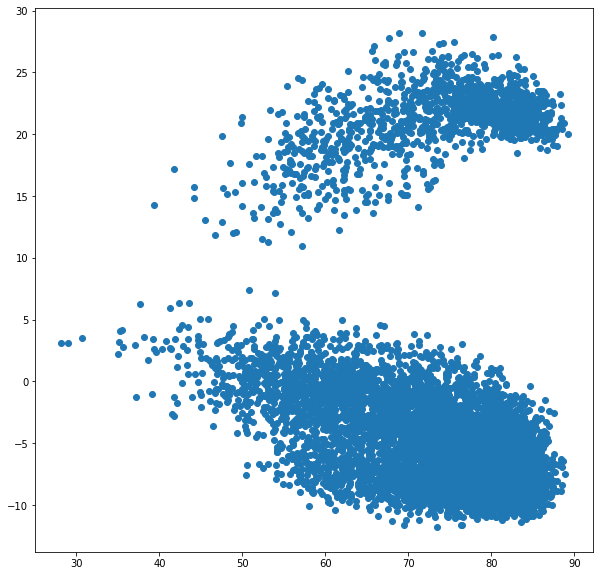

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.scatter(Y[:, 0], Y[:, 2])

plt.show()

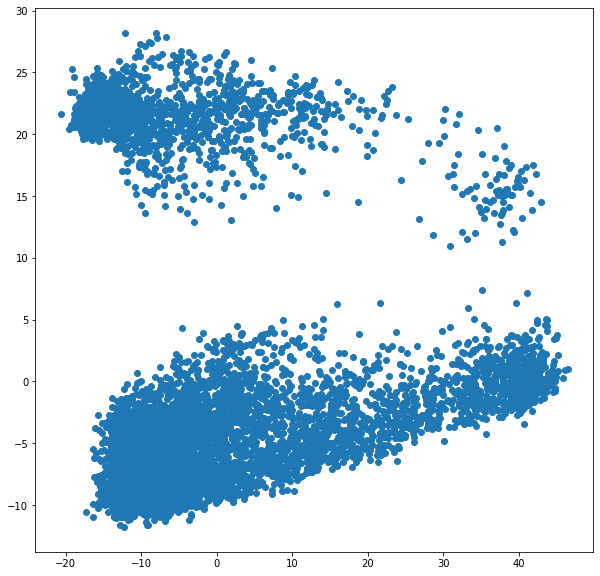

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

ax.scatter(Y[:, 1], Y[:, 2])

plt.show()

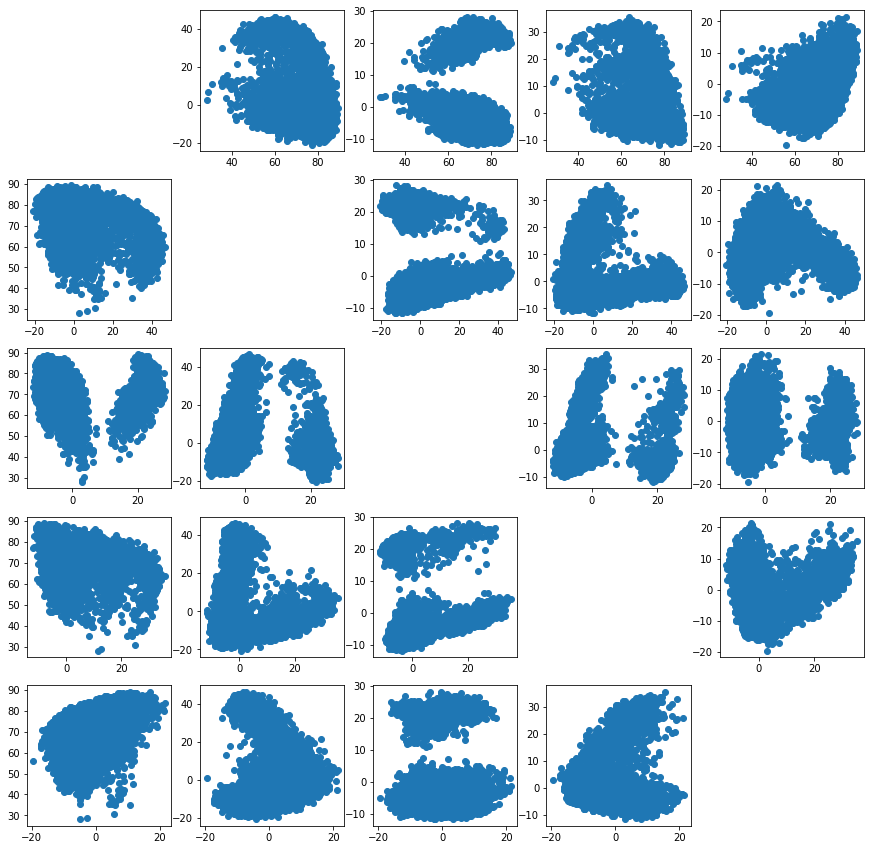

In [13]:
n_components = 5

fig = plt.figure(figsize=(15, 15))
ax_dict = {}

tsvd = TruncatedSVD(n_components=n_components)
tsvd.fit(X)

Y = tsvd.transform(X)

for j in range(n_components):
    for k in range(n_components):
        if j != k:
            ax = fig.add_subplot(n_components, n_components, n_components*j + k + 1)
            ax.scatter(Y[:, j], Y[:, k])

plt.show()